C:\Users\acer\AppData\Local\Temp\ipykernel_11212\3917943295.py:24: RuntimeWarning: divide by zero encountered in log
  b2 = np.log(b3) * gamma


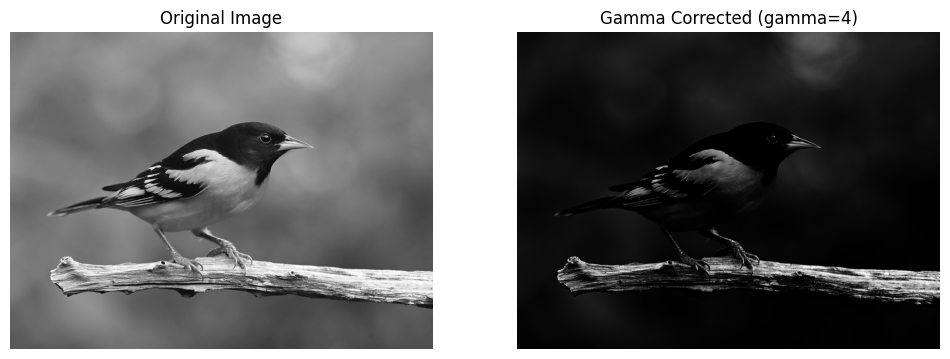

In [6]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Mở ảnh grayscale
img = Image.open('bird.png').convert('L')

# Chuyển ảnh sang mảng numpy
im_1 = np.asarray(img)

# Khởi tạo gamma
gamma = 4

# Chuyển kiểu mảng từ int sang float để tính toán
b1 = im_1.astype(float)

# Tìm giá trị max trong ảnh để chuẩn hóa
b2 = np.max(b1)

# Chuẩn hóa giá trị pixel về [0,1]
b3 = b1 / b2

# Tính toán phần mũ gamma correction
b2 = np.log(b3) * gamma

# Tính giá trị gamma corrected
c = np.exp(b2) * 255.0

# Chuyển kết quả về kiểu uint8 (0-255)
cl = c.astype(np.uint8)

# Tạo ảnh từ mảng numpy sau gamma correction
d = Image.fromarray(cl)

# Hiển thị ảnh gốc và ảnh gamma corrected riêng biệt
img.show(title='Original Image')
d.show(title='Gamma Corrected Image')

# Hiển thị ảnh gốc và ảnh gamma corrected cạnh nhau dùng matplotlib
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(img, cmap='gray')
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(d, cmap='gray')
axs[1].set_title(f'Gamma Corrected (gamma={gamma})')
axs[1].axis('off')

plt.show()


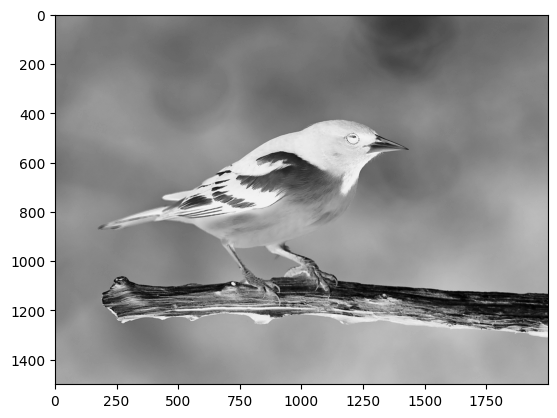

In [8]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Mở ảnh grayscale
img = Image.open('bird.png').convert('L')

# Chuyển ảnh sang mảng numpy
im_1 = np.asarray(img)

# Phép biến đổi nghịch đảo: giá trị pixel mới = 255 - giá trị pixel cũ
im_2 = 255 - im_1

# Chuyển lại mảng numpy thành ảnh PIL
new_img = Image.fromarray(im_2)

# Hiển thị ảnh
new_img.show()

# Hiển thị ảnh dùng matplotlib
plt.imshow(new_img, cmap='gray')
plt.show()


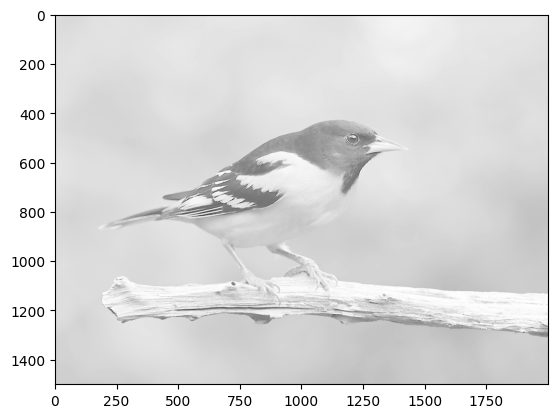

In [10]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Mở ảnh xám
img = Image.open('bird.png').convert('L')

# Chuyển ảnh thành mảng numpy
im_l = np.asarray(img)

# Chuyển dữ liệu từ int sang float
bl = im_l.astype(float)

# Tìm giá trị lớn nhất trong ảnh (dạng float)
b2 = np.max(bl)

# Thực hiện biến đổi log
c = (128.0 * np.log(1 + bl)) / np.log(1 + b2)

# Chuyển dữ liệu về kiểu int
cl = c.astype(np.uint8)

# Chuyển numpy array về ảnh
d = Image.fromarray(cl)

# Hiển thị ảnh gốc
img.show()

# Hiển thị ảnh đã biến đổi
d.show()

# Hiển thị ảnh đã biến đổi dùng matplotlib
plt.imshow(d, cmap='gray')
plt.show()


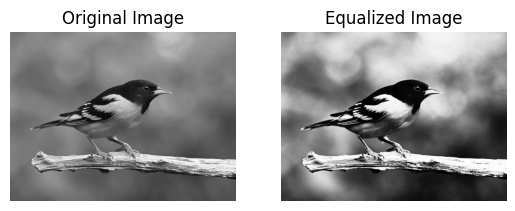

In [11]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Mở ảnh grayscale
img = Image.open('bird.png').convert('L')

# Chuyển ảnh thành numpy array 2D
im_array = np.asarray(img)

# Flatten ảnh thành 1D
im_flat = im_array.flatten()

# Tính histogram và bins
hist, bins = np.histogram(im_flat, bins=256, range=[0, 255])

# Tính cumulative distribution function (CDF)
cdf = hist.cumsum()

# Mask những phần có giá trị 0 trong CDF (không tính vào)
cdf_masked = np.ma.masked_equal(cdf, 0)

# Histogram equalization
cdf_min = cdf_masked.min()
cdf_max = cdf_masked.max()
cdf_eq = (cdf_masked - cdf_min) * 255 / (cdf_max - cdf_min)

# Thay những giá trị bị mask bằng 0
cdf_final = np.ma.filled(cdf_eq, 0).astype('uint8')

# Ánh xạ các giá trị trong ảnh gốc sang giá trị equalized
im2_flat = cdf_final[im_flat]

# Chuyển lại thành ảnh 2D
im2 = im2_flat.reshape(im_array.shape)

# Tạo ảnh mới từ mảng numpy
img_eq = Image.fromarray(im2)

# Hiển thị ảnh gốc và ảnh đã equalization
img.show()
img_eq.show()

# Hiển thị bằng matplotlib
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(im_array, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Equalized Image')
plt.imshow(im2, cmap='gray')
plt.axis('off')

plt.show()


Min pixel value: 0
Max pixel value: 255


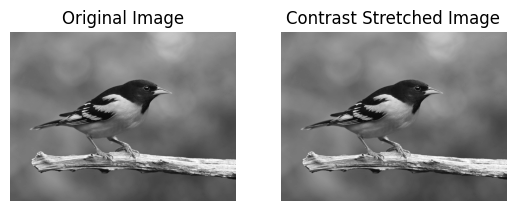

In [12]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Mở ảnh grayscale
img = Image.open('bird.png').convert('L')

# Chuyển ảnh thành numpy array 2D
im_array = np.asarray(img)

# Tìm giá trị min và max của ảnh
a = im_array.min()
b = im_array.max()
print("Min pixel value:", a)
print("Max pixel value:", b)

# Chuyển ảnh về float để tính toán
im_float = im_array.astype(float)

# Kéo giãn tương phản
im_stretched = 255 * (im_float - a) / (b - a)

# Chuyển lại về uint8
im_stretched = im_stretched.astype(np.uint8)

# Tạo ảnh mới từ mảng numpy
img_stretched = Image.fromarray(im_stretched)

# Hiển thị ảnh gốc và ảnh kéo giãn tương phản
img.show()
img_stretched.show()

# Hiển thị ảnh bằng matplotlib
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(im_array, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Contrast Stretched Image')
plt.imshow(im_stretched, cmap='gray')
plt.axis('off')

plt.show()


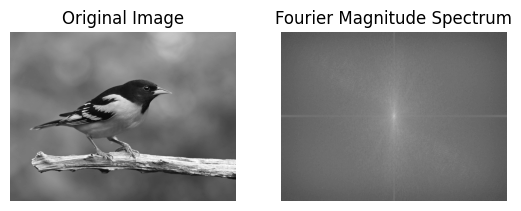

In [14]:
from PIL import Image
import numpy as np
import scipy.fftpack
import matplotlib.pyplot as plt

# Mở ảnh grayscale
img = Image.open('bird.png').convert('L')

# Chuyển ảnh thành mảng numpy
im_array = np.asarray(img)

# Thực hiện FFT 2D trên ảnh
f = scipy.fftpack.fft2(im_array)

# Dịch chuyển tần số thấp về giữa phổ
fshift = scipy.fftpack.fftshift(f)

# Lấy biên độ phổ (magnitude spectrum)
magnitude_spectrum = np.abs(fshift)

# Chuyển sang kiểu float để hiển thị (nếu cần)
magnitude_spectrum = magnitude_spectrum.astype(float)

# Tạo ảnh từ mảng magnitude spectrum (chỉ để hiển thị, không phải ảnh thực tế)
img_spectrum = Image.fromarray(np.log1p(magnitude_spectrum).astype(np.uint8))

# Hiển thị ảnh gốc
img.show()

# Hiển thị phổ Fourier bằng matplotlib
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(im_array, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Fourier Magnitude Spectrum')
plt.imshow(np.log1p(magnitude_spectrum), cmap='gray')
plt.axis('off')

plt.show()


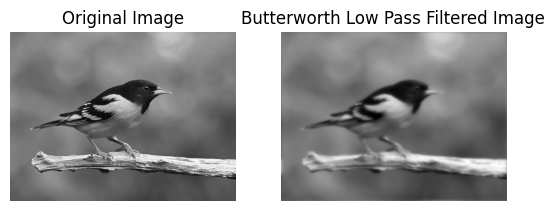

In [15]:
from PIL import Image
import numpy as np
import scipy.fftpack
import matplotlib.pyplot as plt
import math

# Mở ảnh grayscale
img = Image.open('bird.png').convert('L')

# Chuyển ảnh thành mảng numpy
im_array = np.asarray(img)

# Thực hiện FFT 2D
f = scipy.fftpack.fft2(im_array)

# Dịch chuyển phổ Fourier để tần số thấp về giữa
fshift = scipy.fftpack.fftshift(f)

# Kích thước ảnh
M, N = fshift.shape

# Khởi tạo ma trận H chứa hàm truyền của bộ lọc Butterworth
H = np.ones((M, N), dtype=float)

# Tâm phổ (center)
center1 = M / 2
center2 = N / 2

# Bán kính cắt tần số (cut-off radius)
d_0 = 30.0

# Thứ tự của bộ lọc Butterworth (độ dốc của filter)
n = 1

# Xây dựng bộ lọc Butterworth Low Pass Filter (BLPF)
for i in range(M):
    for j in range(N):
        # Tính khoảng cách Euclid từ điểm (i, j) đến tâm phổ
        distance = math.sqrt((i - center1)**2 + (j - center2)**2)
        if distance > 0:
            H[i, j] = 1 / (1 + (distance / d_0)**(2 * n))
        else:
            H[i, j] = 1  # Tại tâm phổ giá trị filter là 1

# Áp dụng bộ lọc lên phổ Fourier
filtered = fshift * H

# Dịch chuyển ngược phổ Fourier về vị trí ban đầu
f_ishift = scipy.fftpack.ifftshift(filtered)

# Tính biến đổi Fourier ngược để lấy ảnh lọc tần số thấp
img_back = scipy.fftpack.ifft2(f_ishift)

# Lấy phần thực của ảnh
img_back = np.abs(img_back)

# Chuyển thành ảnh PIL để hiển thị
img_filtered = Image.fromarray(np.uint8(img_back))

# Hiển thị ảnh gốc và ảnh đã lọc
img.show()

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(im_array, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Butterworth Low Pass Filtered Image')
plt.imshow(img_back, cmap='gray')
plt.axis('off')

plt.show()

img_filtered.show()


# Câu 1 

Lựa chọn phương pháp:
1. Image Inverse Transformation
2. Gamma Correction
3. Log Transformation
4. Histogram Equalization
5. Contrast Stretching
You selected: 2


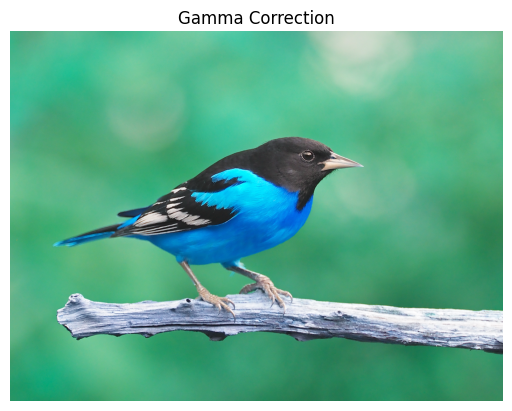

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def show_image(image, title="Image"):
    plt.imshow(image, cmap='gray')  # Sử dụng 'gray' để hiển thị ảnh grayscale
    plt.title(title)
    plt.axis('off')
    plt.show()

# 1. Image Inverse Transformation
def inverse_transformation(image):
    return cv2.bitwise_not(image)

# 2. Gamma Correction
def gamma_correction(image, gamma=1.5):
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255 for i in range(256)]).astype("uint8")
    return cv2.LUT(image, table)

# 3. Log Transformation
def log_transformation(image):
    c = 255 / np.log(1 + np.max(image))
    log_image = c * (np.log(image + 1))
    return np.array(log_image, dtype=np.uint8)

# 4. Histogram Equalization
def histogram_equalization(image):
    # Convert to grayscale for histogram equalization
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return cv2.equalizeHist(gray_image)

# 5. Contrast Stretching
def contrast_stretching(image):
    min_val = np.min(image)
    max_val = np.max(image)
    return cv2.convertScaleAbs(image, alpha=255/(max_val-min_val), beta=-min_val*255/(max_val-min_val))

# Main program with menu
def menu():
    image = cv2.imread('bird.png')  # Đảm bảo rằng đường dẫn đúng
    if image is None:
        print("Ảnh không được tìm thấy. Hãy kiểm tra lại đường dẫn ảnh!")
        return
    
    print("Lựa chọn phương pháp:")
    print("1. Image Inverse Transformation")
    print("2. Gamma Correction")
    print("3. Log Transformation")
    print("4. Histogram Equalization")
    print("5. Contrast Stretching")
    
    # Tự động chọn phương pháp (ví dụ, chọn số 2 cho Gamma Correction)
    choice = 2  # Chọn phương pháp (1, 2, 3, 4, hoặc 5)
    print(f"You selected: {choice}")
    
    if choice == 1:
        result = inverse_transformation(image)
        show_image(result, "Image Inverse Transformation")
    elif choice == 2:
        result = gamma_correction(image)
        show_image(result, "Gamma Correction")
    elif choice == 3:
        result = log_transformation(image)
        show_image(result, "Log Transformation")
    elif choice == 4:
        result = histogram_equalization(image)
        show_image(result, "Histogram Equalization")
    elif choice == 5:
        result = contrast_stretching(image)
        show_image(result, "Contrast Stretching")
    else:
        print("Lựa chọn không hợp lệ!")

if __name__ == "__main__":
    menu()


# Câu 2

Select an option:
1. Fast Fourier Transform
2. Butterworth Lowpass Filter
3. Butterworth Highpass Filter
You selected: 2


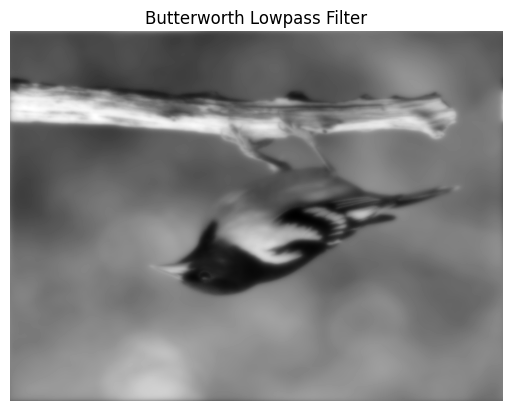

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def show_image(image, title="Image"):
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# 1. Fast Fourier Transform (FFT)
def fast_fourier(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    dft = cv2.dft(np.float32(gray_image), flags=cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)
    magnitude_spectrum = cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1])
    return magnitude_spectrum

# 2. Butterworth Lowpass Filter
def butterworth_lowpass_filter(image, d0=30):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    rows, cols = gray_image.shape
    crow, ccol = rows // 2, cols // 2
    dft = cv2.dft(np.float32(gray_image), flags=cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)
    
    mask = np.ones((rows, cols, 2), np.float32)
    for u in range(rows):
        for v in range(cols):
            d = np.sqrt((u - crow) ** 2 + (v - ccol) ** 2)
            mask[u, v] = 1 / (1 + (d / d0) ** 2)
    
    fshift = dft_shift * mask
    img_back = cv2.idft(fshift)
    img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])
    return img_back

# 3. Butterworth Highpass Filter
def butterworth_highpass_filter(image, d0=30):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    rows, cols = gray_image.shape
    crow, ccol = rows // 2, cols // 2
    dft = cv2.dft(np.float32(gray_image), flags=cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)
    
    mask = np.zeros((rows, cols, 2), np.float32)
    for u in range(rows):
        for v in range(cols):
            d = np.sqrt((u - crow) ** 2 + (v - ccol) ** 2)
            mask[u, v] = 1 / (1 + (d0 / d) ** 2) if d != 0 else 0
    
    fshift = dft_shift * mask
    img_back = cv2.idft(fshift)
    img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])
    return img_back

# Main program with menu
def menu():
    image = cv2.imread('bird.png')  # Đảm bảo rằng đường dẫn đúng
    if image is None:
        print("Ảnh không được tìm thấy. Hãy kiểm tra lại đường dẫn ảnh!")
        return
    
    print("Select an option:")
    print("1. Fast Fourier Transform")
    print("2. Butterworth Lowpass Filter")
    print("3. Butterworth Highpass Filter")
    
    # Đặt lựa chọn mặc định (thử Fast Fourier Transform)
    choice = 2  # Thay giá trị 1, 2, hoặc 3 tùy theo phương pháp bạn muốn thử
    
    print(f"You selected: {choice}")

    if choice == 1:
        result = fast_fourier(image)
        show_image(result, "Fast Fourier Transform")
    elif choice == 2:
        result = butterworth_lowpass_filter(image)
        show_image(result, "Butterworth Lowpass Filter")
    elif choice == 3:
        result = butterworth_highpass_filter(image)
        show_image(result, "Butterworth Highpass Filter")
    else:
        print("Lựa chọn không hợp lệ! Vui lòng chọn lại.")

if __name__ == "__main__":
    menu()


# Câu 3

Processing RGB channels...


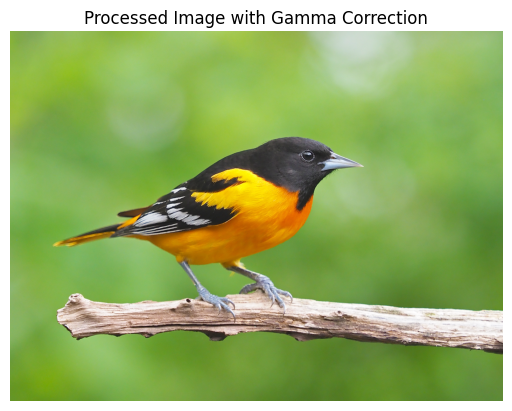

Applied Gamma Correction on each RGB channel.


In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def show_image(image, title="Image"):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Chuyển đổi lại màu từ BGR sang RGB
    plt.title(title)
    plt.axis('off')
    plt.show()

# 1. Image Inverse Transformation (áp dụng cho RGB)
def inverse_transformation(image):
    return cv2.bitwise_not(image)

# 2. Gamma Correction (áp dụng cho RGB)
def gamma_correction(image, gamma=1.5):
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255 for i in range(256)]).astype("uint8")
    return cv2.LUT(image, table)

# 3. Log Transformation (áp dụng cho RGB)
def log_transformation(image):
    c = 255 / np.log(1 + np.max(image))
    log_image = c * (np.log(image + 1))
    return np.array(log_image, dtype=np.uint8)

# 4. Histogram Equalization (áp dụng cho RGB)
def histogram_equalization(image):
    # Convert to grayscale for histogram equalization
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return cv2.equalizeHist(gray_image)

# 5. Contrast Stretching (áp dụng cho RGB)
def contrast_stretching(image):
    min_val = np.min(image)
    max_val = np.max(image)
    return cv2.convertScaleAbs(image, alpha=255/(max_val-min_val), beta=-min_val*255/(max_val-min_val))

# Main program with automatic RGB channel processing
def process_rgb_channels(image):
    # Tách các kênh màu
    (B, G, R) = cv2.split(image)
    
    print("Processing RGB channels...")

    # Tự động chọn phương pháp (ví dụ: chọn phương pháp 2 - Gamma Correction)
    method_choice = 2  # Chọn phương pháp (1, 2, 3, 4, hoặc 5)

    if method_choice == 1:
        # Áp dụng Image Inverse Transformation cho từng kênh
        R_result = inverse_transformation(R)
        G_result = inverse_transformation(G)
        B_result = inverse_transformation(B)
        method_name = "Image Inverse Transformation"
    elif method_choice == 2:
        # Áp dụng Gamma Correction cho từng kênh
        R_result = gamma_correction(R)
        G_result = gamma_correction(G)
        B_result = gamma_correction(B)
        method_name = "Gamma Correction"
    elif method_choice == 3:
        # Áp dụng Log Transformation cho từng kênh
        R_result = log_transformation(R)
        G_result = log_transformation(G)
        B_result = log_transformation(B)
        method_name = "Log Transformation"
    elif method_choice == 4:
        # Áp dụng Histogram Equalization cho từng kênh
        R_result = histogram_equalization(R)
        G_result = histogram_equalization(G)
        B_result = histogram_equalization(B)
        method_name = "Histogram Equalization"
    elif method_choice == 5:
        # Áp dụng Contrast Stretching cho từng kênh
        R_result = contrast_stretching(R)
        G_result = contrast_stretching(G)
        B_result = contrast_stretching(B)
        method_name = "Contrast Stretching"
    else:
        print("Lựa chọn không hợp lệ!")
        return
    
    # Gộp các kênh lại thành ảnh mới
    processed_image = cv2.merge([B_result, G_result, R_result])
    
    # Hiển thị kết quả
    show_image(processed_image, f"Processed Image with {method_name}")
    print(f"Applied {method_name} on each RGB channel.")

# Main function
def menu():
    image = cv2.imread('bird.png')  # Đảm bảo rằng đường dẫn đúng
    if image is None:
        print("Ảnh không được tìm thấy. Hãy kiểm tra lại đường dẫn ảnh!")
        return
    
    process_rgb_channels(image)

if __name__ == "__main__":
    menu()


# Câu 4


Processing RGB channels...


C:\Users\acer\AppData\Local\Temp\ipykernel_17312\1115910511.py:24: RuntimeWarning: overflow encountered in scalar add
  c = 255 / np.log(1 + np.max(image))
C:\Users\acer\AppData\Local\Temp\ipykernel_17312\1115910511.py:24: RuntimeWarning: divide by zero encountered in log
  c = 255 / np.log(1 + np.max(image))
C:\Users\acer\AppData\Local\Temp\ipykernel_17312\1115910511.py:25: RuntimeWarning: divide by zero encountered in log
  log_image = c * (np.log(image + 1))  # Chuyển log về dải giá trị hợp lệ
C:\Users\acer\AppData\Local\Temp\ipykernel_17312\1115910511.py:25: RuntimeWarning: invalid value encountered in multiply
  log_image = c * (np.log(image + 1))  # Chuyển log về dải giá trị hợp lệ
C:\Users\acer\AppData\Local\Temp\ipykernel_17312\1115910511.py:26: RuntimeWarning: invalid value encountered in cast
  return np.array(log_image, dtype=np.uint8)


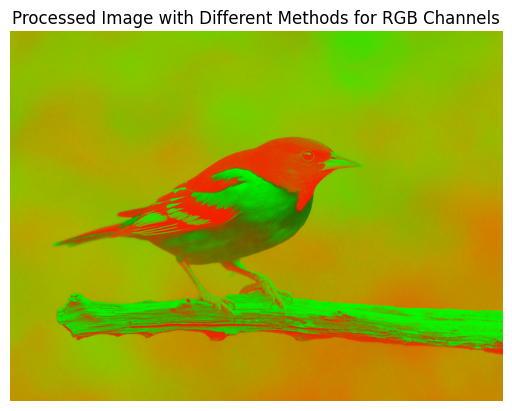

Applied different methods on each RGB channel.


In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def show_image(image, title="Image"):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Chuyển đổi lại màu từ BGR sang RGB
    plt.title(title)
    plt.axis('off')
    plt.show()

# 1. Image Inverse Transformation (áp dụng cho RGB)
def inverse_transformation(image):
    return cv2.bitwise_not(image)

# 2. Gamma Correction (áp dụng cho RGB)
def gamma_correction(image, gamma=1.5):
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255 for i in range(256)]).astype("uint8")
    return cv2.LUT(image, table)

# 3. Log Transformation (áp dụng cho RGB)
def log_transformation(image):
    image = np.clip(image, 1, 255)  # Đảm bảo giá trị nằm trong khoảng [1, 255] để tránh log(0)
    c = 255 / np.log(1 + np.max(image))
    log_image = c * (np.log(image + 1))  # Chuyển log về dải giá trị hợp lệ
    return np.array(log_image, dtype=np.uint8)

# 4. Histogram Equalization (áp dụng cho RGB)
def histogram_equalization(image):
    # Convert to grayscale for histogram equalization
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return cv2.equalizeHist(gray_image)

# 5. Contrast Stretching (áp dụng cho RGB)
def contrast_stretching(image):
    min_val = np.min(image)
    max_val = np.max(image)
    return cv2.convertScaleAbs(image, alpha=255/(max_val-min_val), beta=-min_val*255/(max_val-min_val))

# Main program with RGB channel processing
def process_rgb_channels(image):
    # Tách các kênh màu
    (B, G, R) = cv2.split(image)
    
    print("Processing RGB channels...")

    # Áp dụng Image Inverse Transformation cho kênh đỏ (R)
    R_result = inverse_transformation(R)
    
    # Áp dụng Gamma Correction cho kênh xanh lá (G)
    G_result = gamma_correction(G)
    
    # Áp dụng Log Transformation cho kênh xanh dương (B)
    B_result = log_transformation(B)
    
    # Gộp các kênh lại thành ảnh mới
    processed_image = cv2.merge([B_result, G_result, R_result])
    
    # Hiển thị kết quả
    show_image(processed_image, "Processed Image with Different Methods for RGB Channels")
    print("Applied different methods on each RGB channel.")

# Main function
def menu():
    image = cv2.imread('bird.png')  # Đảm bảo rằng đường dẫn đúng
    if image is None:
        print("Ảnh không được tìm thấy. Hãy kiểm tra lại đường dẫn ảnh!")
        return
    
    process_rgb_channels(image)

if __name__ == "__main__":
    menu()
